In [ ]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Load the CSV file
# Replace 'car_evaluation_codethon.csv' with the path where your file is located.
data = pd.read_csv('car_evaluation_codethon.csv')


In [ ]:
# Step 3: Drop rows with '5more' in 'number of doors' and 'more' in 'number of persons'
data = data[(data['number of doors'] != '5more') & (data['number of persons'] != 'more')]

In [ ]:
# Step 4: One-hot encode other categorical columns (buying price, maintenance cost, lug_boot, safety)
data_encoded = pd.get_dummies(data, columns=['buying price', 'maintenance cost', 'lug_boot', 'safety'])

In [ ]:
# Step 5: Define features (X) and target (y)
X = data_encoded.drop('decision', axis=1)
y = data['decision']

In [ ]:
# Step 6: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Step 7: Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Step 8: Predict on the test data
y_pred = clf.predict(X_test)

In [ ]:
# Step 9: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


In [ ]:
# Step 10: Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       118
           1       0.75      0.95      0.84        19
           2       0.99      0.99      0.99       358
           3       0.83      0.79      0.81        24

    accuracy                           0.96       519
   macro avg       0.88      0.91      0.89       519
weighted avg       0.96      0.96      0.96       519



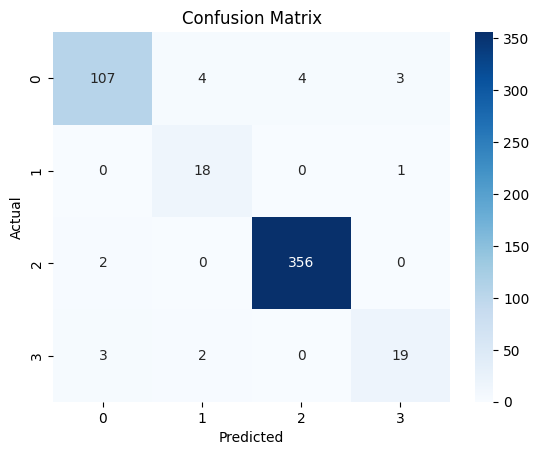

In [ ]:
# Step 11: Plot confusion matrix as a heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()